In [ ]:
pip install pandas scikit-learn statsmodels

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
data_path = '/content/sample_data/yield-curve-rates-1990-2023.csv.csv'
df = pd.read_csv(data_path)


In [ ]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-45-68e0bb7fc68b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Display the first few rows of the dataframe
df.head()


,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-12-29,5.60,5.59,5.40,5.41,5.26,4.79,4.23,4.01,3.84,3.88,3.88,4.20,4.03
1,2023-12-28,5.57,5.55,5.45,5.42,5.28,4.82,4.26,4.02,3.83,3.84,3.84,4.14,3.98
2,2023-12-27,5.55,5.53,5.44,5.42,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95
3,2023-12-26,5.53,5.52,5.45,5.44,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04
4,2023-12-22,5.54,5.52,5.44,5.45,5.31,4.82,4.31,4.04,3.87,3.92,3.90,4.21,4.05


In [ ]:
# Feature columns (maturities)
features = ['1 Mo', '2 Mo', '3 Mo', '4 Mo','6 Mo','1 Yr','2 Yr','3 Yr','5 Yr','7 Yr','10 Yr','20 Yr','30 Yr']  # Add all maturity columns here


In [ ]:
# Target variable (let's predict Maturity1 as an example)
X = df[features]
y = df['1 Mo']

In [ ]:
# Import the necessary library
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the column names
print(df.columns)

Index(['Date', '1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr',
       '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')


In [ ]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
# Check the columns again
print(df.columns)

Index(['Date', '1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr',
       '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')


In [ ]:
!pip install sklearn
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Fit the imputer on the training data and transform X_train
X_train = imputer.fit_transform(X_train)

# Impute missing values in y_train (target variable)
y_train = imputer.fit_transform(y_train.reshape(-1, 1)) # Removed .values
# Reshape y_train to a 2D array for the imputer

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel()) # Flatten y_train back to a 1D array

RandomForestRegressor(random_state=42)

In [ ]:
# Import the necessary library and class
from sklearn.ensemble import RandomForestRegressor

# Transform X_test using the trained imputer
X_test = imputer.transform(X_test)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Impute missing values in y_test if necessary
# Convert y_test to a NumPy array before reshaping
y_test = imputer.fit_transform(y_test.to_numpy().reshape(-1, 1)).ravel()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0019219960446960256


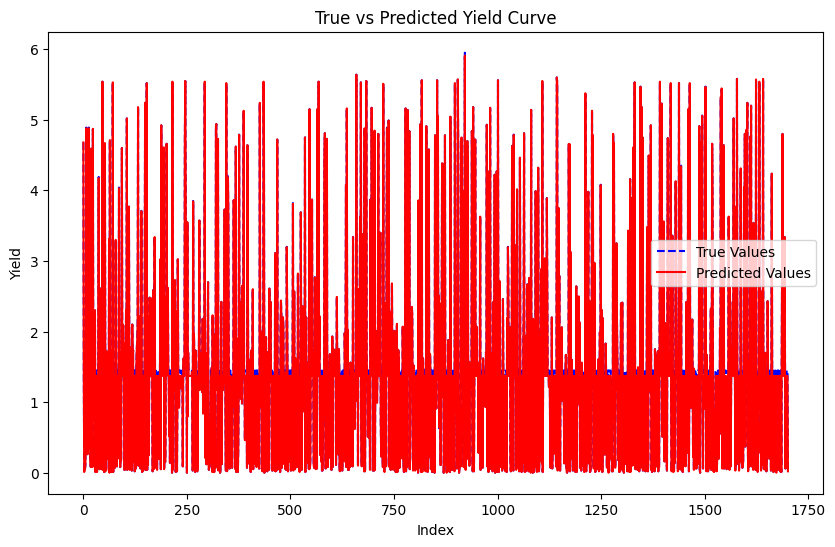

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='blue', linestyle='--') # Remove .values
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Yield')
plt.title('True vs Predicted Yield Curve')
plt.legend()
plt.show()